# Predicting Alzheimer's Diagnosis

The Alzheimer's dataset from MIT contains about 75k observations of demographic, lifestyle, medical, and genetic information about individuals, along with whether or not they have been diagnosed with Alzheimer's. 

The dataset resides here: 
https://www.kaggle.com/datasets/ankushpanday1/alzheimers-prediction-dataset-global/data

My goal is to determine whether these features can be used to predict a diagnosis of Alzheimer's, and if so, which features are most contributory towards this prediction. 

This work is on GitHub at https://github.com/particularfinish/CU_Projects/blob/main/Alzheimers%20predictions.ipynb. 

## 1. Load, Explore and Prep Data

### 1a. Import libraries and load dataset

In [310]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor



%matplotlib inline

In [177]:
df = pd.read_csv('alzheimers_prediction_dataset.csv')

### 1b. Explore data

In [179]:
print(f"The shape of the dataset is {df.shape}")

The shape of the dataset is (74283, 25)


In [180]:
print('First few rows of dataset:')
df.head()

First few rows of dataset:


,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,No,No,...,Healthy,High,Retired,Single,No,Low,Medium,High,Urban,No
1,Argentina,72,Male,7,29.9,Medium,Former,Never,No,No,...,Healthy,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No
2,South Africa,86,Female,19,22.9,High,Current,Occasionally,No,Yes,...,Average,Medium,Employed,Single,No,Low,Medium,High,Rural,No
3,China,53,Male,17,31.2,Low,Never,Regularly,Yes,No,...,Healthy,Medium,Retired,Single,No,High,Medium,Low,Rural,No
4,Sweden,58,Female,3,30.0,High,Former,Never,Yes,No,...,Unhealthy,High,Employed,Married,No,Low,Medium,High,Rural,No


In [181]:
df.columns

Index(['Country', 'Age', 'Gender', 'Education Level', 'BMI',
       'Physical Activity Level', 'Smoking Status', 'Alcohol Consumption',
       'Diabetes', 'Hypertension', 'Cholesterol Level',
       'Family History of Alzheimer’s', 'Cognitive Test Score',
       'Depression Level', 'Sleep Quality', 'Dietary Habits',
       'Air Pollution Exposure', 'Employment Status', 'Marital Status',
       'Genetic Risk Factor (APOE-ε4 allele)', 'Social Engagement Level',
       'Income Level', 'Stress Levels', 'Urban vs Rural Living',
       'Alzheimer’s Diagnosis'],
      dtype='object')

In [182]:
# Are there any missing values?
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Missing Values in Each Column:
Country                                 0
Age                                     0
Gender                                  0
Education Level                         0
BMI                                     0
Physical Activity Level                 0
Smoking Status                          0
Alcohol Consumption                     0
Diabetes                                0
Hypertension                            0
Cholesterol Level                       0
Family History of Alzheimer’s           0
Cognitive Test Score                    0
Depression Level                        0
Sleep Quality                           0
Dietary Habits                          0
Air Pollution Exposure                  0
Employment Status                       0
Marital Status                          0
Genetic Risk Factor (APOE-ε4 allele)    0
Social Engagement Level                 0
Income Level                            0
Stress Levels                           0
Ur

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74283 entries, 0 to 74282
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country                               74283 non-null  object 
 1   Age                                   74283 non-null  int64  
 2   Gender                                74283 non-null  object 
 3   Education Level                       74283 non-null  int64  
 4   BMI                                   74283 non-null  float64
 5   Physical Activity Level               74283 non-null  object 
 6   Smoking Status                        74283 non-null  object 
 7   Alcohol Consumption                   74283 non-null  object 
 8   Diabetes                              74283 non-null  object 
 9   Hypertension                          74283 non-null  object 
 10  Cholesterol Level                     74283 non-null  object 
 11  Family History 

In [184]:
# remove apostrophe for convenience
df.rename(columns={'Alzheimer’s Diagnosis': 'Alzheimers Diagnosis',
                  'Family History of Alzheimer’s':'Family History of Alzheimers'}, inplace=True)

It's a little tedious, but I want to see what the columns contain. 

In [186]:
for column in df.columns:
    print(f"The unique values of {column} are {df[column].unique()}")

The unique values of Country are ['Spain' 'Argentina' 'South Africa' 'China' 'Sweden' 'South Korea'
 'Germany' 'UK' 'Canada' 'India' 'Italy' 'USA' 'Russia' 'Japan'
 'Australia' 'France' 'Norway' 'Saudi Arabia' 'Mexico' 'Brazil']
The unique values of Age are [90 72 86 53 58 55 91 67 84 80 69 56 61 64 51 60 82 63 76 87 89 73 68 57
 77 62 59 50 88 78 52 74 70 75 65 81 94 79 93 92 83 85 71 66 54]
The unique values of Gender are ['Male' 'Female']
The unique values of Education Level are [ 1  7 19 17  3  2 18 11 15 10  6 13 12  4 16  5 14  0  8  9]
The unique values of BMI are [33.  29.9 22.9 31.2 30.  34.  24.1 23.6 22.  32.4 31.6 19.8 35.  32.1
 29.1 33.1 27.9 31.7 28.  30.9 19.3 25.  20.5 30.7 31.3 26.  34.1 25.6
 27.  25.8 27.2 27.5 19.7 30.2 27.8 26.1 19.5 33.2 30.4 25.4 30.8 33.8
 28.6 27.7 26.3 28.4 29.5 29.  33.6 23.5 31.4 19.9 20.1 18.8 19.  23.1
 34.7 31.9 29.3 22.6 21.3 23.3 26.5 23.9 31.5 32.6 24.3 22.2 32.  29.6
 25.2 33.9 20.9 21.  26.6 34.6 25.7 21.5 19.2 20.7 18.6 24.  32.5 2

Let's plot the distribution of each column, using a piechart if the only values are 'No' or 'Yes' and a histogram/count plot if not.

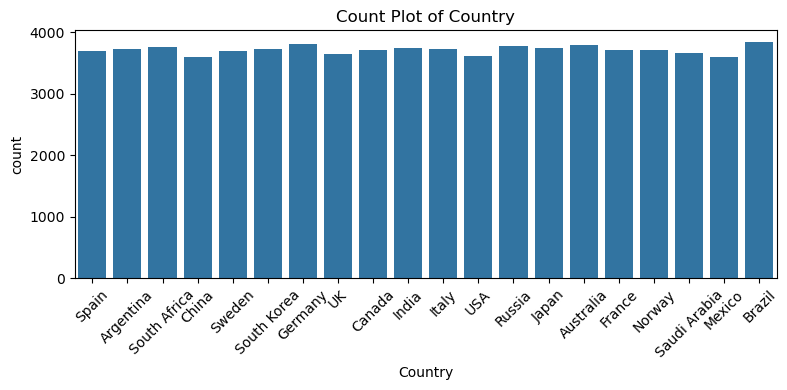

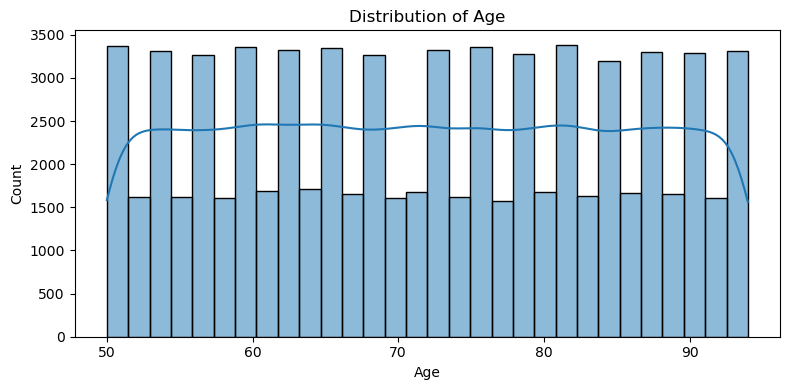

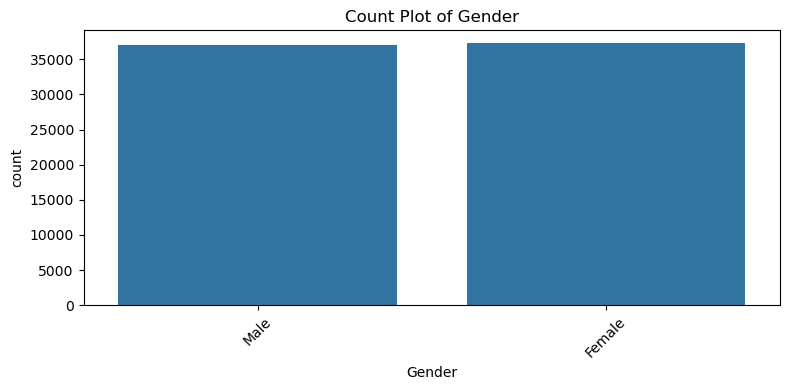

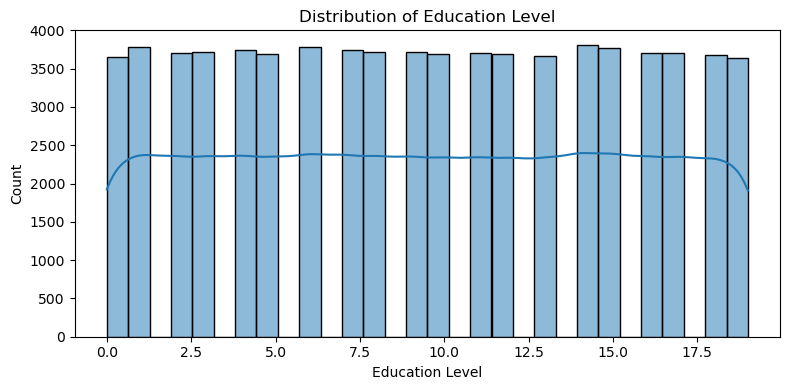

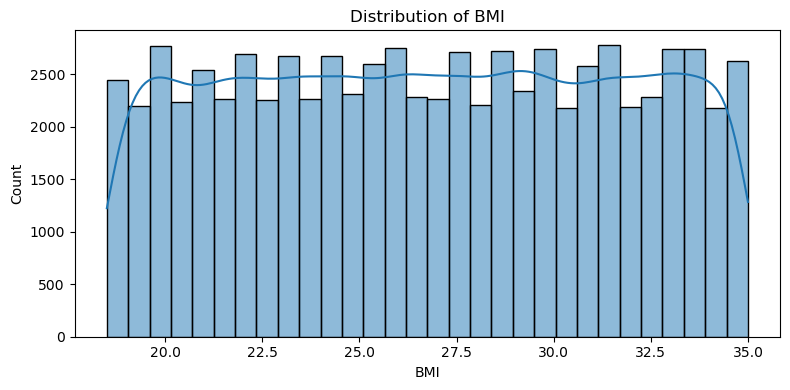

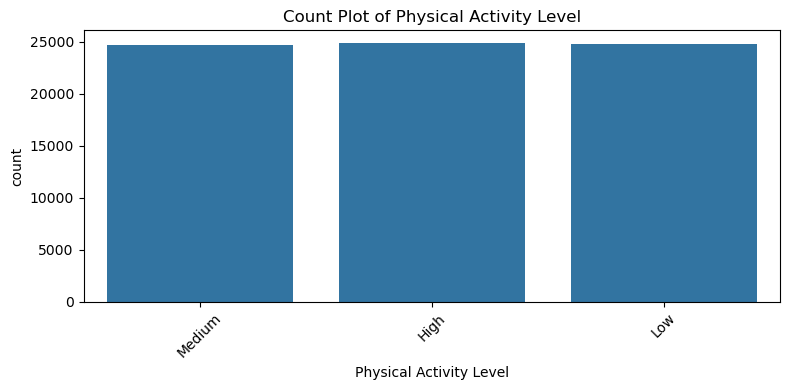

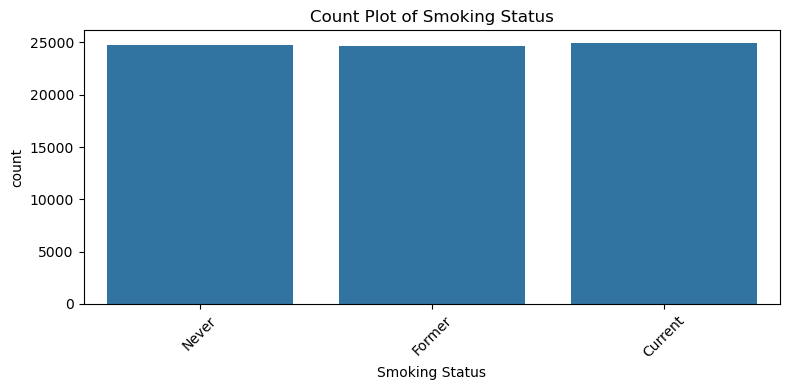

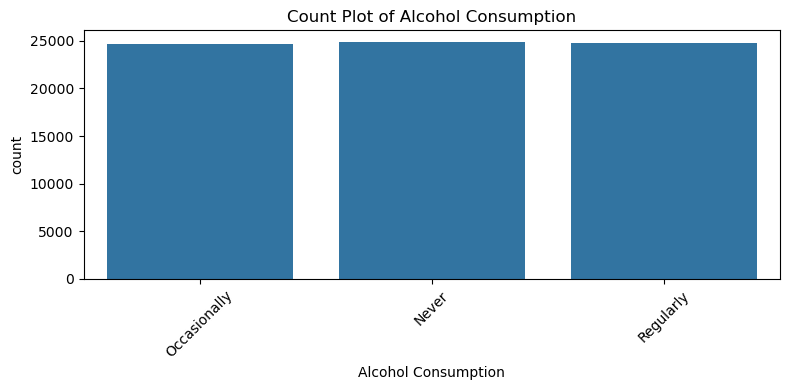

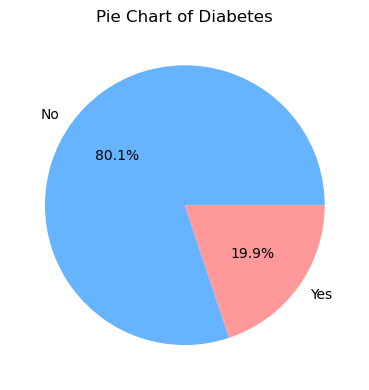

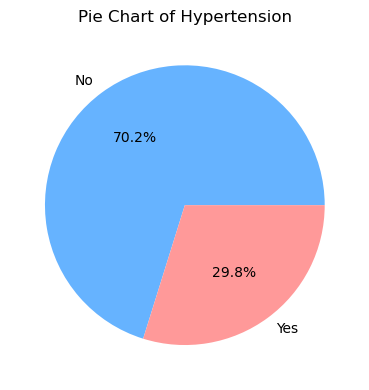

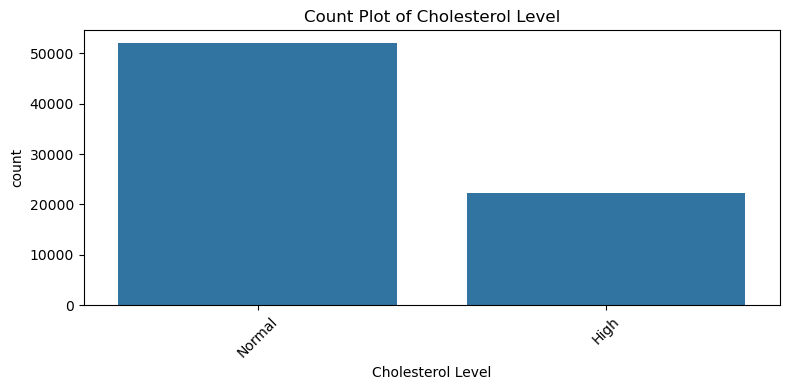

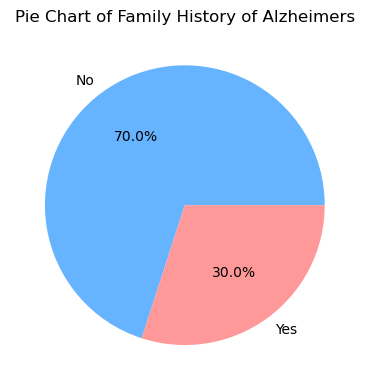

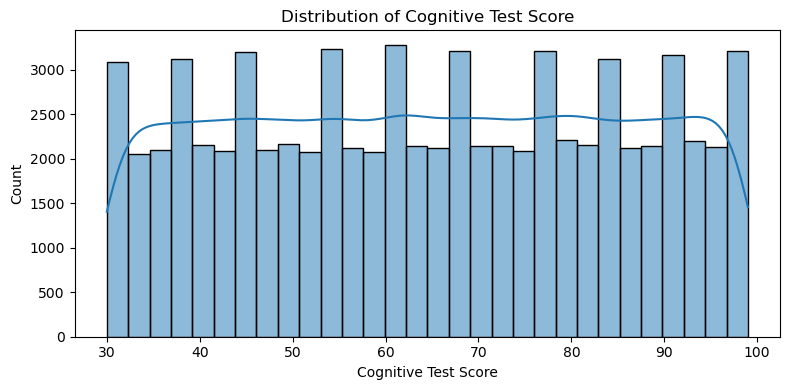

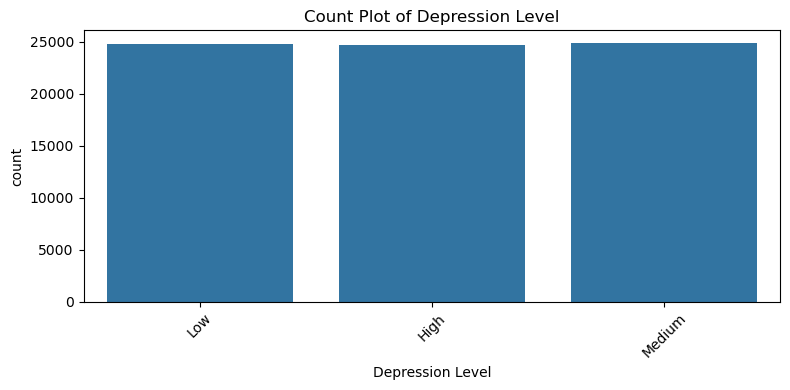

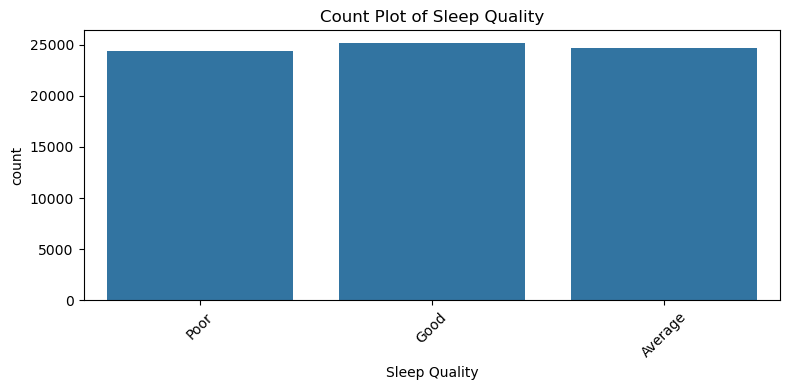

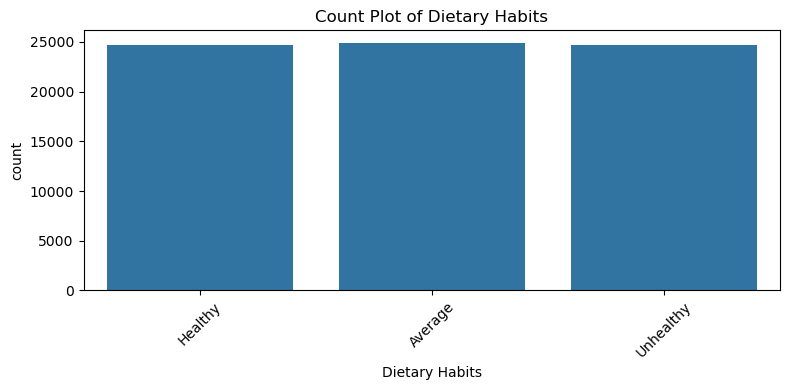

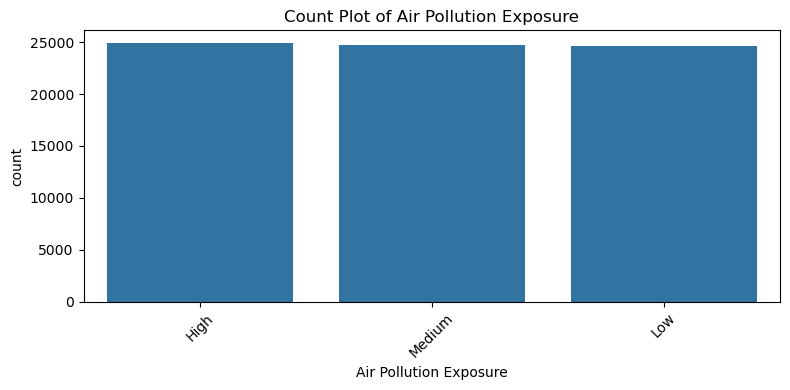

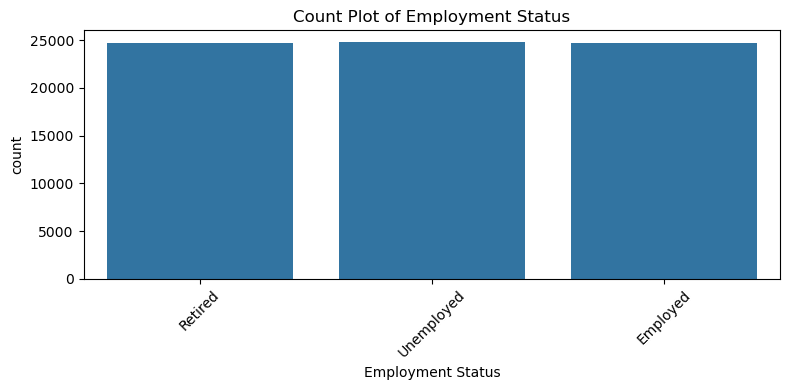

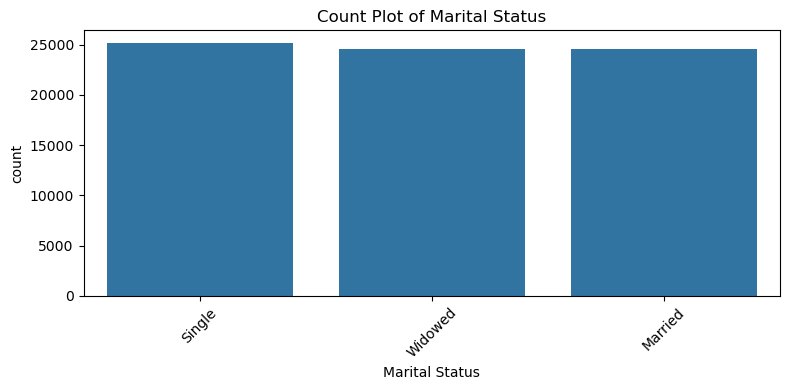

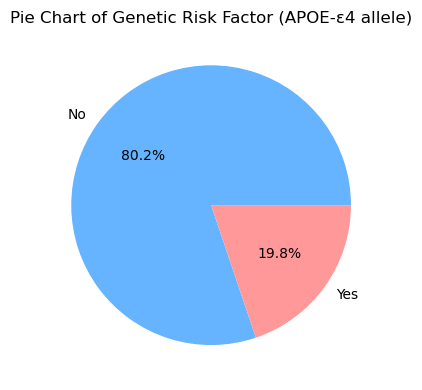

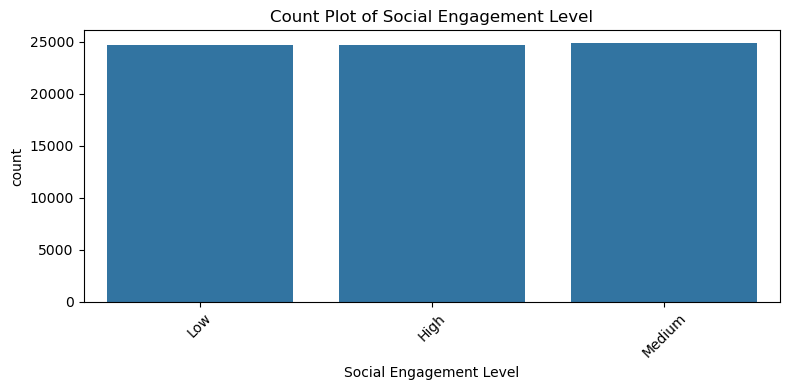

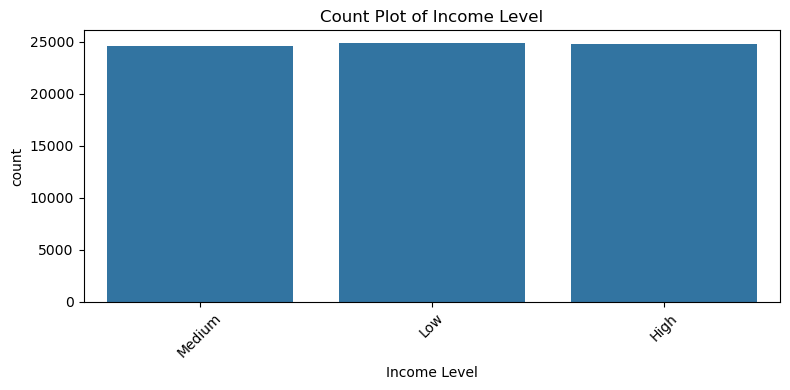

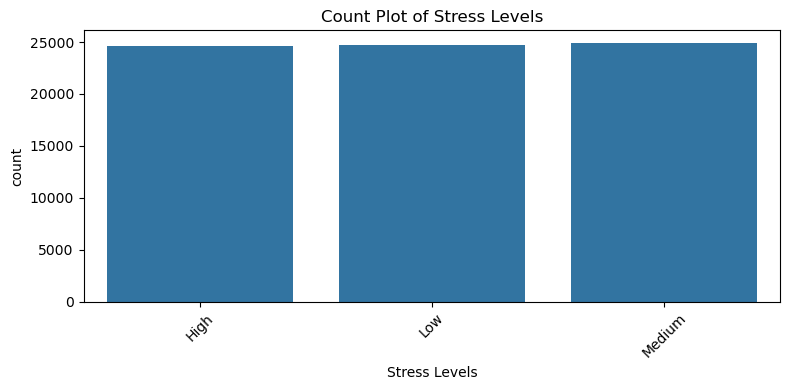

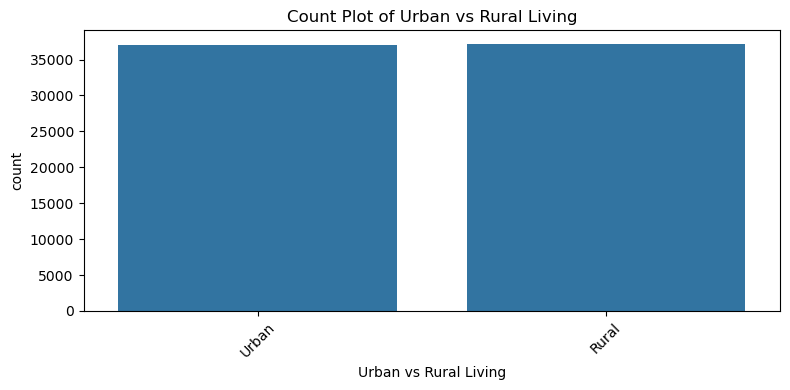

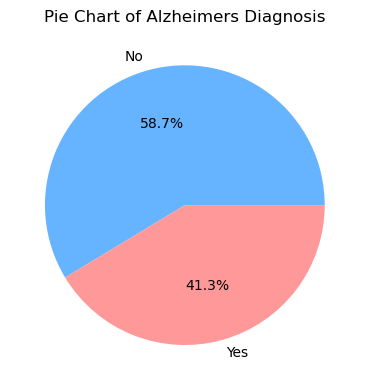

In [188]:
# Loop through each column and plot its distribution.
for column in df.columns:
    plt.figure(figsize=(8, 4))  # Adjust figure size
    
    # Check if the column is numeric
    if pd.api.types.is_numeric_dtype(df[column]):
        # Histogram + KDE for numeric variables
        sns.histplot(df[column], kde=True, bins=30)
        plt.title(f'Distribution of {column}')
    
    else:
        # Get unique values to check if only "Yes" and "No" exist
        unique_values = df[column].dropna().unique()
        
        if set(unique_values) == {"Yes", "No"}:  # If only Yes/No values exist
            counts = df[column].value_counts()
            plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=["#66b3ff", "#ff9999"])
            plt.title(f'Pie Chart of {column}')
        
        else:
            # Count plot for other categorical variables
            sns.countplot(data=df, x=column)
            plt.title(f'Count Plot of {column}')
            plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

The dataset is fairly balanced. The ratio of Alzheimer's diagnosis positive to negative is about 60/40, meaning we will not have to use SMOTE or some other type of class weighting. The other features have been carefully balanced it appears, with an even distribution across much of the dataset for characteristics like age, urban vs rural, stress levels and so forth. 

Let's look at how the numeric features relate to the Alzheimer's diagnosis. 

numeric features : ['Age', 'Education Level', 'BMI', 'Cognitive Test Score']


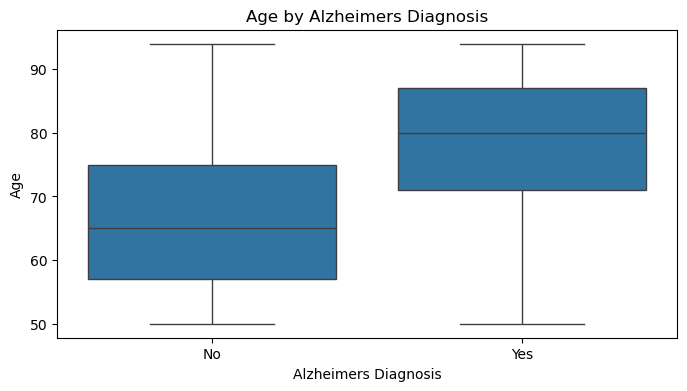

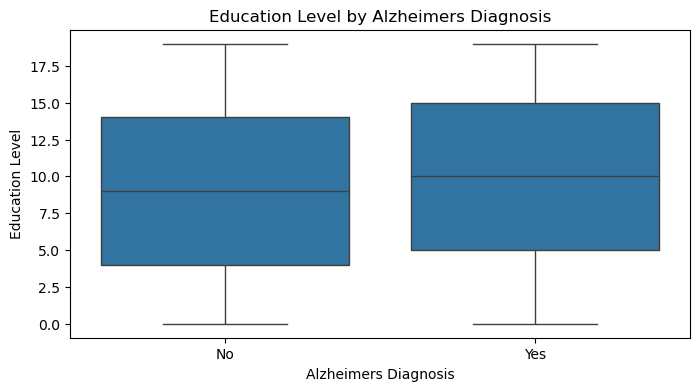

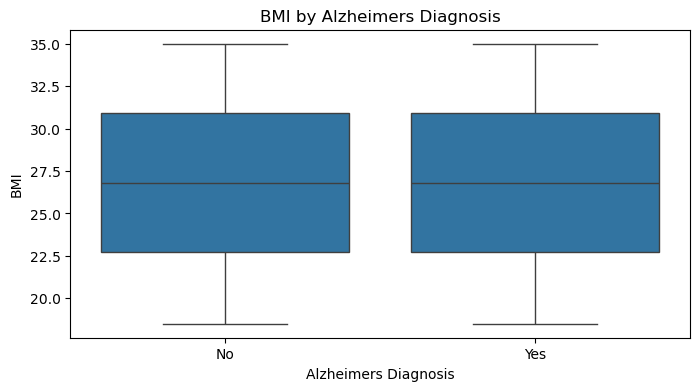

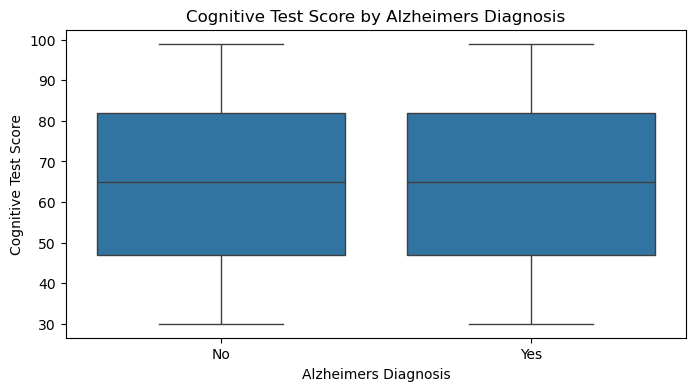

In [191]:
# ----------------------------
# 5. Bivariate Analysis
# ----------------------------
target = "Alzheimers Diagnosis"  

if target in df.columns:
    # Box plots to see the spread of numeric features with respect to the target
    numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
    numeric_features = [col for col in numeric_features if col != target]
    print('numeric features :', numeric_features)
    for col in numeric_features:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=target, y=col, data=df)
        plt.title(f'{col} by {target}')
        plt.show()

It looks like the only numeric feature that may have an effect on diagnosis is age. Higher education level looks weakly correlated to a diagnosis.

### 1c. Make features into categorical variables or one hot encoded

Where is it clear that the values within a feature have an ordinal quality, such as 'Physical Activity' and 'low', 'medium', and 'high', make those features numerical. 

In [195]:
df['Physical Activity Level'].unique()

array(['Medium', 'High', 'Low'], dtype=object)

In [196]:
# Define the order explicitly
cat_dtype = pd.CategoricalDtype(categories=["Low", "Medium", "High"], ordered=True)

# Convert the column to this categorical type
df["Physical Activity Level"] = df["Physical Activity Level"].astype(cat_dtype)

# Create a new column with the integer codes
df["Physical Activity Encoded"] = df["Physical Activity Level"].cat.codes

In [197]:
df['Smoking Status'].unique()

array(['Never', 'Former', 'Current'], dtype=object)

In [198]:
# Define the order explicitly
cat_dtype = pd.CategoricalDtype(categories=["Never", "Former", "Current"], ordered=True)

# Convert the column to this categorical type
df["Smoking Status"] = df["Smoking Status"].astype(cat_dtype)

# Create a new column with the integer codes
df["Smoking Status Encoded"] = df["Smoking Status"].cat.codes

In [199]:
df['Alcohol Consumption'].unique()

array(['Occasionally', 'Never', 'Regularly'], dtype=object)

In [200]:
# Define the order explicitly
cat_dtype = pd.CategoricalDtype(categories=["Never", "Occasionally", "Regularly"], ordered=True)

# Convert the column to this categorical type
df["Alcohol Consumption"] = df["Alcohol Consumption"].astype(cat_dtype)

# Create a new column with the integer codes
df["Alcohol Consumption Encoded"] = df["Alcohol Consumption"].cat.codes

In [201]:
df['Depression Level'].unique()

array(['Low', 'High', 'Medium'], dtype=object)

In [202]:
# Define the order explicitly
cat_dtype = pd.CategoricalDtype(categories=["Low", "Medium", "High"], ordered=True)

# Convert the column to this categorical type
df["Depression Level"] = df["Depression Level"].astype(cat_dtype)

# Create a new column with the integer codes
df["Depression Level Encoded"] = df["Depression Level"].cat.codes

In [203]:
df['Sleep Quality'].unique()

array(['Poor', 'Good', 'Average'], dtype=object)

In [204]:
# Define the order explicitly
cat_dtype = pd.CategoricalDtype(categories=["Poor", "Average", "Good"], ordered=True)

# Convert the column to this categorical type
df["Sleep Quality"] = df["Sleep Quality"].astype(cat_dtype)

# Create a new column with the integer codes
df["Sleep Quality Encoded"] = df["Sleep Quality"].cat.codes

In [205]:
df['Air Pollution Exposure'].unique()

array(['High', 'Medium', 'Low'], dtype=object)

In [206]:
# Define the order explicitly
cat_dtype = pd.CategoricalDtype(categories=["Low", "Medium", "High"], ordered=True)

# Convert the column to this categorical type
df["Air Pollution Exposure"] = df["Air Pollution Exposure"].astype(cat_dtype)

# Create a new column with the integer codes
df["Air Pollution Exposure Encoded"] = df["Air Pollution Exposure"].cat.codes

In [207]:
df['Social Engagement Level'].unique()

array(['Low', 'High', 'Medium'], dtype=object)

In [208]:
# Define the order explicitly
cat_dtype = pd.CategoricalDtype(categories=["Low", "Medium", "High"], ordered=True)

# Convert the column to this categorical type
df["Social Engagement Level"] = df["Social Engagement Level"].astype(cat_dtype)

# Create a new column with the integer codes
df["Social Engagement Level Encoded"] = df["Social Engagement Level"].cat.codes

In [209]:
df['Stress Levels'].unique()

array(['High', 'Low', 'Medium'], dtype=object)

In [210]:
# Define the order explicitly
cat_dtype = pd.CategoricalDtype(categories=["Low", "Medium", "High"], ordered=True)

# Convert the column to this categorical type
df["Stress Levels"] = df["Stress Levels"].astype(cat_dtype)

# Create a new column with the integer codes
df["Stress Levels Encoded"] = df["Stress Levels"].cat.codes

In [211]:
df['Dietary Habits'].unique()

array(['Healthy', 'Average', 'Unhealthy'], dtype=object)

In [212]:
# Define the order explicitly
cat_dtype = pd.CategoricalDtype(categories=["Unhealthy", "Average", "Healthy"], ordered=True)

# Convert the column to this categorical type
df["Dietary Habits"] = df["Dietary Habits"].astype(cat_dtype)

# Create a new column with the integer codes
df["Dietary Habits Encoded"] = df["Dietary Habits"].cat.codes

In [213]:
df['Income Level'].unique()

array(['Medium', 'Low', 'High'], dtype=object)

In [214]:
# Define the order explicitly
cat_dtype = pd.CategoricalDtype(categories=["Low", "Medium", "High"], ordered=True)

# Convert the column to this categorical type
df["Income Level"] = df["Income Level"].astype(cat_dtype)

# Create a new column with the integer codes
df["Income Level Encoded"] = df["Income Level"].cat.codes

In [215]:
# drop all of those native columns
df.drop(columns=['Income Level', 'Dietary Habits', 'Stress Levels', 'Social Engagement Level', 'Air Pollution Exposure', 
                 'Sleep Quality', 'Depression Level', 'Alcohol Consumption', 'Smoking Status', 'Physical Activity Level'], inplace=True)

For those columns that do not have a natural ordinal order, such as Employment Status, use one-hot encoding. 

In [217]:
# Initialize the encoder
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' avoids multicollinearity

# Fit and transform the gender column
encoded_array = encoder.fit_transform(df[['Gender', 'Diabetes', 'Hypertension', 'Cholesterol Level',
                                         'Family History of Alzheimers', 'Employment Status', 
                                         'Genetic Risk Factor (APOE-ε4 allele)',
                                         'Urban vs Rural Living', 'Marital Status']])

# Convert to DataFrame
df_encoded = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['Gender', 'Diabetes', 'Hypertension', 'Cholesterol Level',
                                         'Family History of Alzheimers', 'Employment Status', 
                                         'Genetic Risk Factor (APOE-ε4 allele)',
                                         'Urban vs Rural Living', 'Marital Status']))

# Concatenate with original DataFrame (if needed)
df = pd.concat([df, df_encoded], axis=1)

In [218]:
df.columns

Index(['Country', 'Age', 'Gender', 'Education Level', 'BMI', 'Diabetes',
       'Hypertension', 'Cholesterol Level', 'Family History of Alzheimers',
       'Cognitive Test Score', 'Employment Status', 'Marital Status',
       'Genetic Risk Factor (APOE-ε4 allele)', 'Urban vs Rural Living',
       'Alzheimers Diagnosis', 'Physical Activity Encoded',
       'Smoking Status Encoded', 'Alcohol Consumption Encoded',
       'Depression Level Encoded', 'Sleep Quality Encoded',
       'Air Pollution Exposure Encoded', 'Social Engagement Level Encoded',
       'Stress Levels Encoded', 'Dietary Habits Encoded',
       'Income Level Encoded', 'Gender_Male', 'Diabetes_Yes',
       'Hypertension_Yes', 'Cholesterol Level_Normal',
       'Family History of Alzheimers_Yes', 'Employment Status_Retired',
       'Employment Status_Unemployed',
       'Genetic Risk Factor (APOE-ε4 allele)_Yes',
       'Urban vs Rural Living_Urban', 'Marital Status_Single',
       'Marital Status_Widowed'],
      dtype='ob

## 2. Ready the data for modeling

In [220]:
df.drop(columns=['Gender', 'Diabetes', 'Hypertension', 'Cholesterol Level', 'Family History of Alzheimers', 'Employment Status', 
        'Genetic Risk Factor (APOE-ε4 allele)', 'Urban vs Rural Living', 'Marital Status'], inplace=True)

Map the Alzheimer's Diagnosis column. 

In [222]:
# Define mapping (specific to "Alzheimer’s Diagnosis")
alz_mapping = {"Alzheimers Diagnosis": {"No": 0, "Yes": 1}}

# Apply mapping
df["Alzheimers Diagnosis"] = df["Alzheimers Diagnosis"].replace(alz_mapping["Alzheimers Diagnosis"])


C:\Users\mcefalo\AppData\Local\Temp\ipykernel_37612\1427358736.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Alzheimers Diagnosis"] = df["Alzheimers Diagnosis"].replace(alz_mapping["Alzheimers Diagnosis"])


In [223]:
# drop country
df.drop(columns=['Country'], inplace=True)

In [224]:
# Define Features (X) and Target (y)
X = df.drop(columns=["Alzheimers Diagnosis"])  # Exclude target column
y = df["Alzheimers Diagnosis"]

My first inclination is to use decision trees, but I might want to try other models also. So even though you don't have to scale numerical features for decisions trees, I'll do that now. 

In [226]:
# Train-Test Split (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [312]:
# Check for collinearity with variance inflation factor

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
print(vif_data)

                                     Feature        VIF
0                                        Age  22.075427
1                            Education Level   3.613619
2                                        BMI  22.513489
3                       Cognitive Test Score  10.159491
4                  Physical Activity Encoded   2.463952
5                     Smoking Status Encoded   2.469180
6                Alcohol Consumption Encoded   2.458707
7                   Depression Level Encoded   2.464352
8                      Sleep Quality Encoded   2.484884
9             Air Pollution Exposure Encoded   2.472077
10           Social Engagement Level Encoded   2.461792
11                     Stress Levels Encoded   2.471406
12                    Dietary Habits Encoded   2.472545
13                      Income Level Encoded   2.453203
14                               Gender_Male   1.979041
15                              Diabetes_Yes   1.244654
16                          Hypertension_Yes   1

## 3. Model

### 3a. Gradient Boosting

Trying the Gradient Boosting model first with a set of parameters chosen without grid search, for a basic analysis. 

In [249]:
X_train.shape, y_train.shape

((59426, 25), (59426,))

In [251]:
# Train Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [255]:
# Predict on Test Set
y_pred = gb_model.predict(X_test)

In [257]:
# Evaluate Performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.7255

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.73      0.76      8719
           1       0.65      0.72      0.69      6138

    accuracy                           0.73     14857
   macro avg       0.72      0.73      0.72     14857
weighted avg       0.73      0.73      0.73     14857



In [259]:
# Feature Importance Plot
feature_importance = gb_model.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]

In [261]:
median_importance = np.median(feature_importance)
print("Feature Importance Median Threshold:", median_importance)
print("Feature Importances:\n", feature_importance)

Feature Importance Median Threshold: 0.0003603742918702926
Feature Importances:
 [7.68006461e-01 2.01050766e-03 4.30875948e-03 2.18456850e-03
 1.17433007e-04 7.31315636e-05 7.95424437e-04 4.33701606e-04
 2.43558819e-04 1.09126843e-04 3.66746396e-04 6.61588952e-04
 4.89500777e-04 1.03164631e-04 5.97499978e-05 2.50755371e-04
 2.05720288e-05 2.28988609e-04 7.75165469e-02 9.67550885e-05
 4.49290523e-04 1.41058197e-01 3.60374292e-04 0.00000000e+00
 5.50966862e-05]


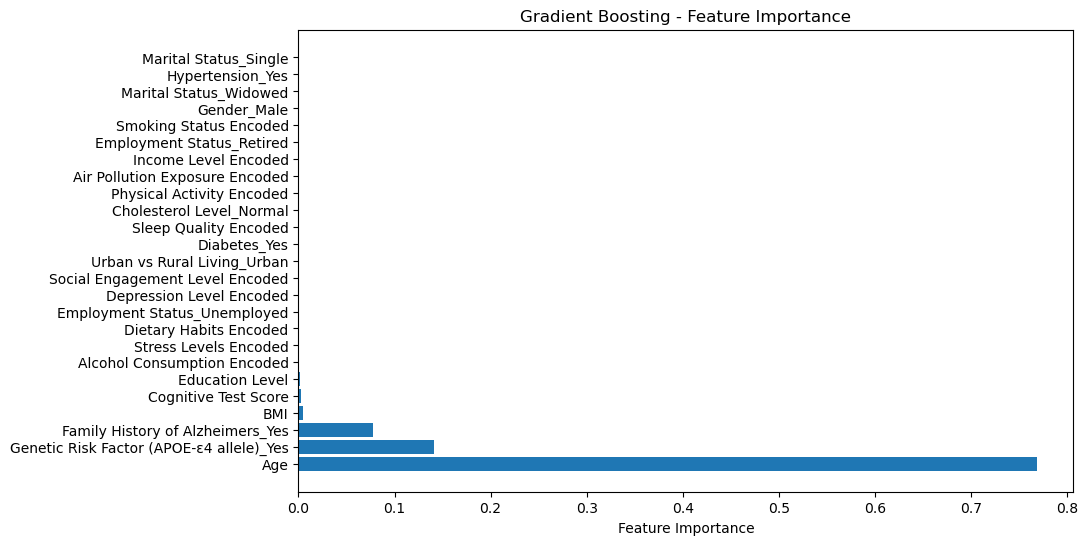

In [263]:
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Gradient Boosting - Feature Importance")
plt.show()

In [265]:
import shap

# Create SHAP explainer for the trained model
explainer = shap.TreeExplainer(gb_model)  # Use your trained Gradient Boosting model
shap_values = explainer.shap_values(X_test)  # Get SHAP values for test data

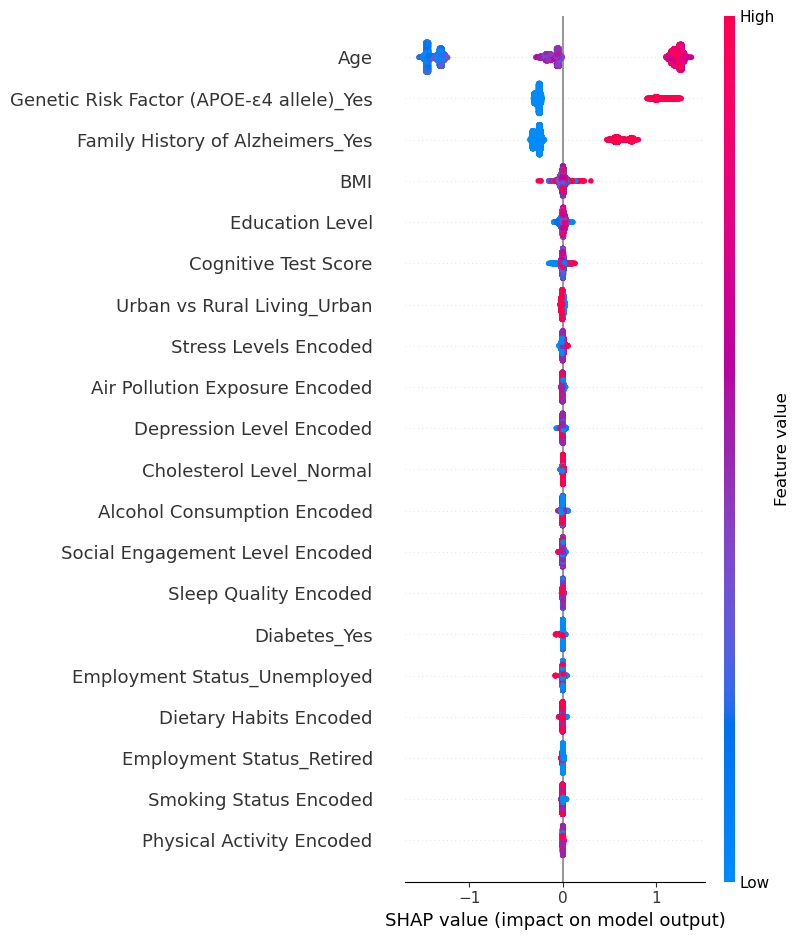

In [269]:
shap.summary_plot(shap_values, X_test, plot_type="dot")


In [272]:
selector = SelectFromModel(gb_model, threshold="median", prefit=True)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

C:\Users\mcefalo\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\mcefalo\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [279]:
# Get selected feature names from selector.get_support()
selected_features = X_train.columns[selector.get_support()]
print(selected_features)

Index(['Age', 'Education Level', 'BMI', 'Cognitive Test Score',
       'Alcohol Consumption Encoded', 'Depression Level Encoded',
       'Social Engagement Level Encoded', 'Stress Levels Encoded',
       'Dietary Habits Encoded', 'Family History of Alzheimers_Yes',
       'Employment Status_Unemployed',
       'Genetic Risk Factor (APOE-ε4 allele)_Yes',
       'Urban vs Rural Living_Urban'],
      dtype='object')


In [281]:
# Convert NumPy array back to DataFrame
X_train_selected_df = pd.DataFrame(X_train_selected, columns=selected_features)
X_test_selected_df = pd.DataFrame(X_test_selected, columns=selected_features)

In [283]:
X_train_selected_df.head()

,Age,Education Level,BMI,Cognitive Test Score,Alcohol Consumption Encoded,Depression Level Encoded,Social Engagement Level Encoded,Stress Levels Encoded,Dietary Habits Encoded,Family History of Alzheimers_Yes,Employment Status_Unemployed,Genetic Risk Factor (APOE-ε4 allele)_Yes,Urban vs Rural Living_Urban
0,53.0,9.0,19.7,66.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,92.0,9.0,31.2,99.0,2.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0
2,64.0,5.0,20.7,59.0,2.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0
3,85.0,17.0,19.1,81.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,55.0,4.0,20.6,65.0,1.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0


Let's fit the model on the reduced set of features. 

In [288]:
# Train Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train_selected_df, y_train)

GradientBoostingClassifier(random_state=42)

In [289]:
# Predict on Test Set# Predict on Test Set
y_pred = gb_model.predict(X_test_selected_df)

In [290]:
# Evaluate Performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.7254

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.73      0.76      8719
           1       0.65      0.72      0.69      6138

    accuracy                           0.73     14857
   macro avg       0.72      0.73      0.72     14857
weighted avg       0.73      0.73      0.73     14857



In [294]:
# Feature Importance Plot
feature_importance = gb_model.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]

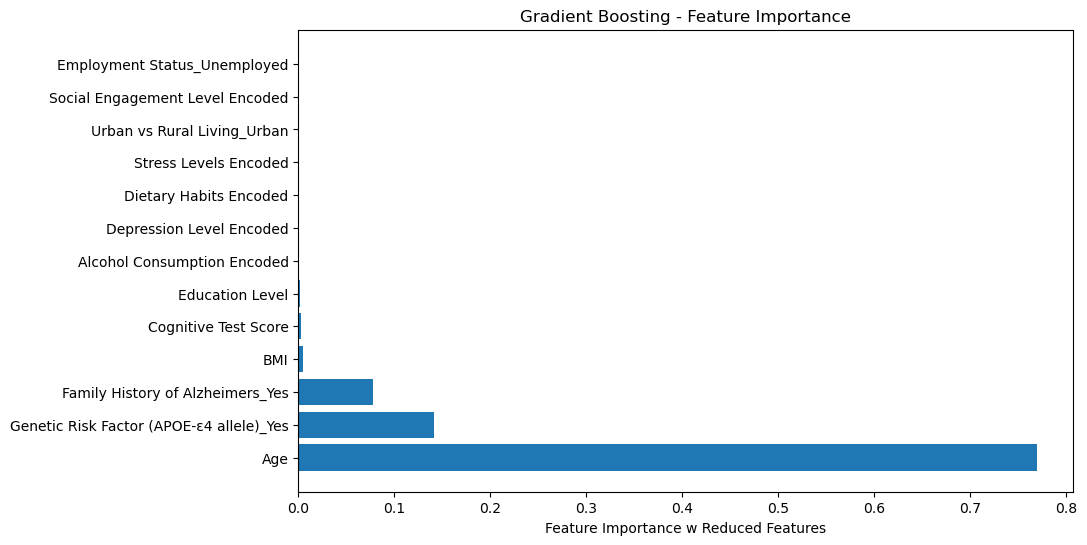

In [298]:
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), np.array(X_test_selected_df.columns)[sorted_idx])
plt.xlabel("Feature Importance w Reduced Features")
plt.title("Gradient Boosting - Feature Importance")
plt.show()

### 3b. Grid search

Let's try a gridsearch. 

In [285]:
# Train Gradient Boosting Model with Hyperparameter Tuning
param_grid = {
    'n_estimators': [500, 1000],  # More boosting rounds
    'learning_rate': [0.01, 0.05],  # Lower step size
    'max_depth': [3, 5],  # More complexity
    'subsample': [0.8],  # Column sampling
    'max_features': ["sqrt"],  # Feature sampling
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

gb_model = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(gb_model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_selected_df, y_train)

# Best Model
best_model = grid_search.best_estimator_

print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)


Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000, 'subsample': 0.8}
Best accuracy: 0.7272069196815044


The original GB Model was better. 


### 3c. Try other models, for possible increase in accuracy

In [300]:
# scale the parameters
# Scale Continuous Features (Standardize Age, BMI, etc.)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected_df)
X_test_scaled = scaler.transform(X_test_selected_df)

In [302]:

# Define Models
models = {
    "GradientBoosting": GradientBoostingClassifier(n_estimators=1000, learning_rate=0.01, max_depth=3, subsample=0.8, 
                                                   max_features='sqrt', min_samples_leaf=1, min_samples_split=2, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=500, learning_rate=0.05, max_depth=5, subsample=0.8, eval_metric="logloss", use_label_encoder=False, random_state=42),
    "LightGBM": LGBMClassifier(n_estimators=500, learning_rate=0.05, max_depth=5, subsample=0.8, random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=500, max_depth=5, random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "NeuralNetwork": MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, activation='relu', solver='adam', random_state=42)
}

# Train and Evaluate Models
for name, model in models.items():
    if name in ["LogisticRegression", "NeuralNetwork"]:  # Scale inputs for these models
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train_selected_df, y_train)
        y_pred = model.predict(X_test_selected_df)
    
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))



GradientBoosting Accuracy: 0.7257
              precision    recall  f1-score   support

           0       0.79      0.73      0.76      8719
           1       0.65      0.72      0.69      6138

    accuracy                           0.73     14857
   macro avg       0.72      0.73      0.72     14857
weighted avg       0.73      0.73      0.73     14857



C:\Users\mcefalo\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:33:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Accuracy: 0.7180
              precision    recall  f1-score   support

           0       0.77      0.74      0.76      8719
           1       0.65      0.68      0.67      6138

    accuracy                           0.72     14857
   macro avg       0.71      0.71      0.71     14857
weighted avg       0.72      0.72      0.72     14857

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 24575, number of negative: 34851
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001812 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 327
[LightGBM] [Info] Number of data points in the train set: 59426, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.413540 -> initscore=-0.349352
[LightGBM] [Info] Start training from score -0.349352
[LightGBM]

## 4. Interpretation

The model with the highest accuracy using our selected features is the gradient boosting model with the hyperparameters found through gridsearch. 

The gradient boosing model also had the highest precision. Reducing false positives may avoid inflicting unnecessary stress on individuals who wish to get their Alzheimer's risk assessed. On the other hand, Logistic Regression, while having a lower accuracy (.7110) had the highest recall. If there are drugs that may prevent Alzheimer's that have little chance of side effects, high recall would be more desirable so as to not miss any true positives. 

The feature most important in the prediction is age, not surprisingly. After age, once features are reduced, we have the following contributors:
1. Age
2. Genetic Risk Factor
3. Family History
4. BMI

The only modifiable one is BMI! 

Let's run the model one more time but remove age, family history and genetics, and see what modifiable factors may be related to a prediction of Alzheimer's. 


In [305]:
df.columns

Index(['Age', 'Education Level', 'BMI', 'Cognitive Test Score',
       'Alzheimers Diagnosis', 'Physical Activity Encoded',
       'Smoking Status Encoded', 'Alcohol Consumption Encoded',
       'Depression Level Encoded', 'Sleep Quality Encoded',
       'Air Pollution Exposure Encoded', 'Social Engagement Level Encoded',
       'Stress Levels Encoded', 'Dietary Habits Encoded',
       'Income Level Encoded', 'Gender_Male', 'Diabetes_Yes',
       'Hypertension_Yes', 'Cholesterol Level_Normal',
       'Family History of Alzheimers_Yes', 'Employment Status_Retired',
       'Employment Status_Unemployed',
       'Genetic Risk Factor (APOE-ε4 allele)_Yes',
       'Urban vs Rural Living_Urban', 'Marital Status_Single',
       'Marital Status_Widowed'],
      dtype='object')

In [1058]:
# Define Features (X) and Target (y)
X = df.drop(columns=["Alzheimers Diagnosis", "Age", "Family History of Alzheimers_Yes", 
                     'Genetic Risk Factor (APOE-ε4 allele)_Yes'])  # Exclude target column
y = df["Alzheimers Diagnosis"]

In [1060]:
# Train-Test Split (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1062]:
# Train Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [1064]:
# Predict on Test Set
y_pred = gb_model.predict(X_test)

In [1066]:
# Evaluate Performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.5867

Classification Report:
               precision    recall  f1-score   support

           0       0.59      1.00      0.74      8719
           1       0.25      0.00      0.00      6138

    accuracy                           0.59     14857
   macro avg       0.42      0.50      0.37     14857
weighted avg       0.45      0.59      0.43     14857



With an accuracy of .5867, that's a pretty poor model! However, the recall is perfect. This means we aren't missing any positives. 

In [1071]:
# Feature Importance Plot
feature_importance = gb_model.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]

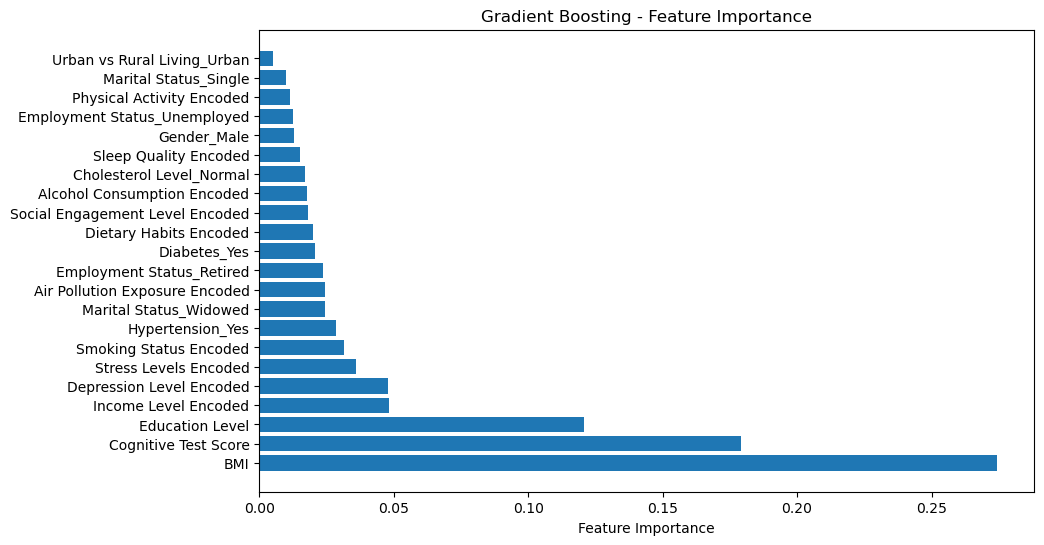

In [1073]:
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Gradient Boosting - Feature Importance")
plt.show()

Now we have some interesting, modifiable features to look at. BMI comes out on top, but we see depression, stress, smoking, and hypertension all as contributing factors to Alzheimer's risk. Because you can't change your genetics, the best thing you can do to decrease your risk is to live a happy and healthy life. 